#### Data

The data was acquired from Kaggle and contains data on accepted loans from The Lending Club from 2007 to Q3 2017. There are 1,646,801 rows in the data set. 

link : https://www.kaggle.com/wordsforthewise/lending-club/data

In [291]:
len(raw_data)

1646801

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import scipy.stats as stats
%matplotlib inline

In [3]:
# Import data
raw_data = pd.read_csv("accepted_data.csv")

C:\Users\shaba\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,18,48,58,117,128,129,130,133,134,135,138,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [282]:
raw_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-2014,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0.0,Aug-1994,750.0,754.0,0.0,NaN,NaN,6.0,0.0,138008.0,29.0,17.0,w,0.00,0.00,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,Jun-2016,12017.81,NaN,Nov-2017,684.0,680.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,149140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184500.0,NaN,NaN,NaN,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,NaN,NaN,NaN,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,Charged Off,n,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0.0,Sep-1989,710.0,714.0,2.0,42.0,NaN,17.0,0.0,6133.0,31.6,36.0,w,0.00,0.00,6611.69,6611.69,5217.75,872.67,0.0,521.27,93.8286,Aug-2016,321.08,NaN,Feb-2017,564.0,560.0,0.0,59.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,162110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19400.0,NaN,NaN,NaN,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,5.0,42.0,1.0,42.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [322]:
data = raw_data[["loan_amnt","term","int_rate","annual_inc","fico_range_low","revol_util","dti","delinq_2yrs","recoveries","mths_since_last_delinq"]]

In [281]:
#Change display options
pd.set_option('display.height', 1000) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)

height has been deprecated.



In [290]:
raw_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-2014,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0.0,Aug-1994,750.0,754.0,0.0,NaN,NaN,6.0,0.0,138008.0,29.0,17.0,w,0.00,0.00,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,Jun-2016,12017.81,NaN,Nov-2017,684.0,680.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,149140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184500.0,NaN,NaN,NaN,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,NaN,NaN,NaN,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,Charged Off,n,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0.0,Sep-1989,710.0,714.0,2.0,42.0,NaN,17.0,0.0,6133.0,31.6,36.0,w,0.00,0.00,6611.69,6611.69,5217.75,872.67,0.0,521.27,93.8286,Aug-2016,321.08,NaN,Feb-2017,564.0,560.0,0.0,59.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,162110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19400.0,NaN,NaN,NaN,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,5.0,42.0,1.0,42.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [230]:
raw_data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646774e+06,1.646421e+06,1.646749e+06,1.646778e+06,...,5778.0,5778.000000,5778.0,5778.000000,4822.000000,5778.000000,5778.000000,13290.000000,13290.000000,13290.000000
mean,NaN,1.473331e+04,1.472608e+04,1.470244e+04,1.321857e+01,4.394122e+02,7.730483e+04,1.852473e+01,3.344311e-01,6.957068e+02,...,3.0,151.587664,3.0,11.108688,446.130348,11607.266805,185.757715,5389.960476,48.485745,10.579910
std,NaN,8.803698e+03,8.800813e+03,8.805917e+03,4.704294e+00,2.592256e+02,1.207276e+05,1.098422e+01,9.048755e-01,3.130254e+01,...,0.0,123.463493,0.0,10.287269,361.855546,7459.800633,199.735241,3831.509446,8.995510,8.853511
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.320000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,82.960000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.760000e+00,2.517700e+02,4.600000e+04,1.207000e+01,0.000000e+00,6.700000e+02,...,3.0,58.932500,3.0,0.000000,173.347500,5709.287500,27.100000,2488.140000,45.000000,1.000000
50%,NaN,1.260000e+04,1.260000e+04,1.250000e+04,1.274000e+01,3.770400e+02,6.500000e+04,1.789000e+01,0.000000e+00,6.900000e+02,...,3.0,118.780000,3.0,11.000000,352.635000,10130.580000,123.360000,4515.055000,45.305000,12.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.803400e+02,9.200000e+04,2.432000e+01,0.000000e+00,7.100000e+02,...,3.0,207.650000,3.0,20.000000,606.885000,15993.665000,284.692500,7307.060000,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,4.200000e+01,8.450000e+02,...,3.0,893.050000,3.0,37.000000,2679.150000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


### Exploration

In [458]:
#Five varibales for exploration plus outcome variable
five_variables = data[["loan_amnt","dti","term","fico_range_low","revol_util","int_rate"]]

In [459]:
continious = []
continious = five_variables[['loan_amnt',"int_rate","fico_range_low","revol_util","dti"]]

In [460]:
continious["60_Month_Term"] = np.where(data["term"] == " 60 months",1,0)

In [461]:
continious.head()

,loan_amnt,int_rate,fico_range_low,revol_util,dti,60_Month_Term
0,15000.0,12.39,750.0,29.0,12.03,1
1,10400.0,6.99,710.0,31.6,14.92,0
2,21425.0,15.59,685.0,76.2,18.49,1
3,12800.0,17.14,665.0,100.9,8.31,1
4,7650.0,13.66,685.0,91.9,34.81,0


In [462]:
continious_jittered = continious
jitter = pd.DataFrame(np.random.uniform(-.3, .3, size=(continious_jittered.shape)),columns=continious_jittered.columns)
continious_jittered = continious_jittered.add(jitter)

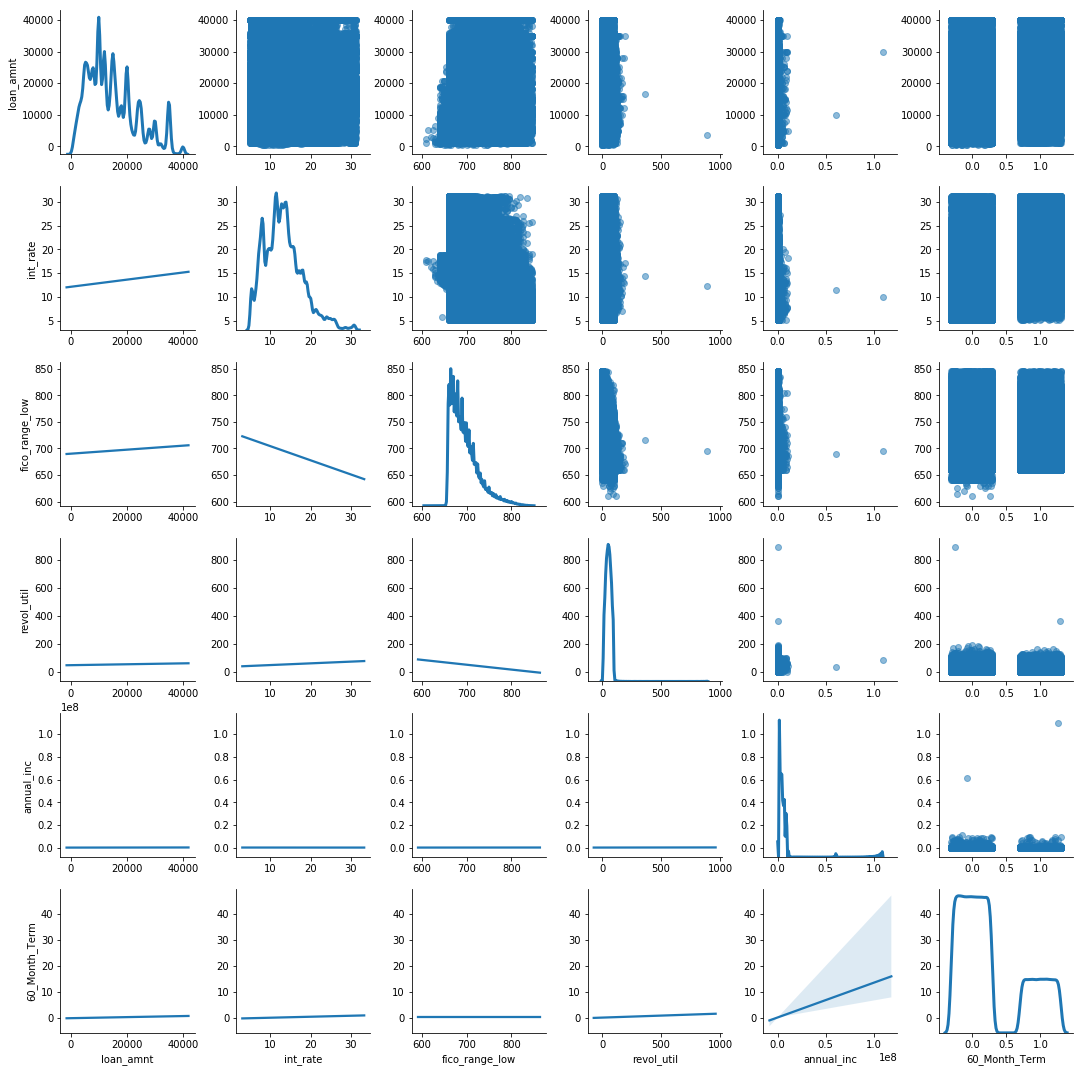

In [302]:
g=sns.PairGrid(continious_jittered.dropna(), diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [463]:
#Correlation matrix of variables
corrmat = continious.corr()
print(corrmat)

                loan_amnt  int_rate  fico_range_low  revol_util       dti  60_Month_Term
loan_amnt        1.000000  0.140534        0.106327    0.118652  0.039969       0.397808
int_rate         0.140534  1.000000       -0.400822    0.239027  0.146022       0.395955
fico_range_low   0.106327 -0.400822        1.000000   -0.449614 -0.055315       0.001308
revol_util       0.118652  0.239027       -0.449614    1.000000  0.139453       0.082625
dti              0.039969  0.146022       -0.055315    0.139453  1.000000       0.071250
60_Month_Term    0.397808  0.395955        0.001308    0.082625  0.071250       1.000000


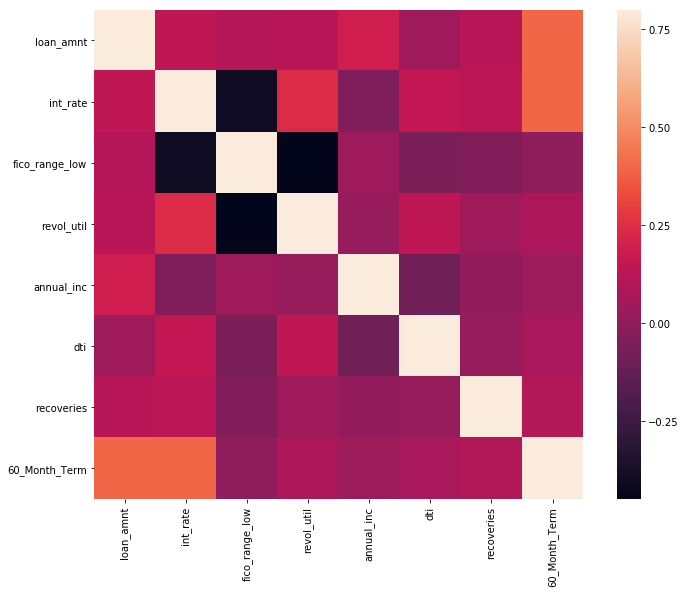

In [335]:
#Heat map of potential variables

f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corrmat,vmax=.8, square=True)
plt.show()

In [117]:
#Combine categorial and continious variables for plotting
cat_cont = data[['loan_amnt',"int_rate","installment","annual_inc","grade","term"]].dropna()

cat_cont_long = cat_cont
cat_cont_long = pd.melt(cat_cont_long, id_vars="grade")

Text(0.5,1,'Interest Rate by Term Boxplot')

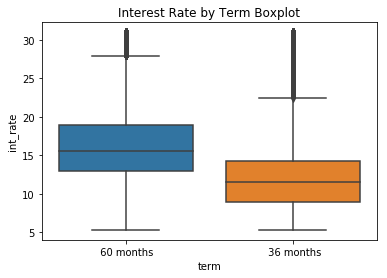

In [436]:
#Box plot of interest rate by loan term
sns.boxplot(x="term", y="int_rate", data=cat_cont)
plt.title("Interest Rate by Term Boxplot")
plt.show()

Text(0.5,1,'Loan Amount by Term Box Plot')

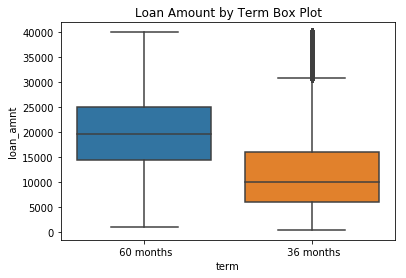

In [455]:
# Box plot of term and loan amount
sns.boxplot(x="term", y="loan_amnt", data=cat_cont)
plt.title("Loan Amount by Term Box Plot")

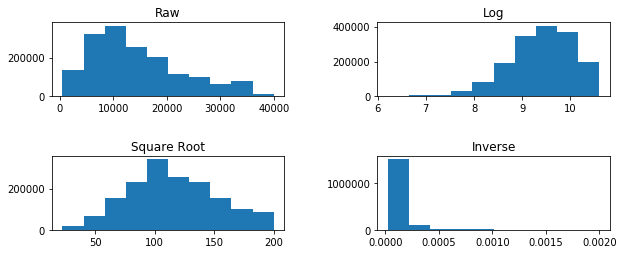

In [449]:
#look at loan amount distribution
fig = plt.figure(figsize=(10,6))


fig.add_subplot(221)
plt.hist(data["loan_amnt"].dropna())
plt.title("Raw")

fig.add_subplot(222)
plt.hist(np.log(data["loan_amnt"].dropna()))
plt.title("Log")

fig.add_subplot(223)
plt.hist(np.sqrt(data["loan_amnt"].dropna()))
plt.title("Square Root")

fig.add_subplot(224)
plt.hist(1/data["loan_amnt"].dropna())
plt.title("Inverse")

plt.subplots_adjust(bottom = .4 , wspace = .4, hspace = .8, left= .125, right= .9)

plt.show()

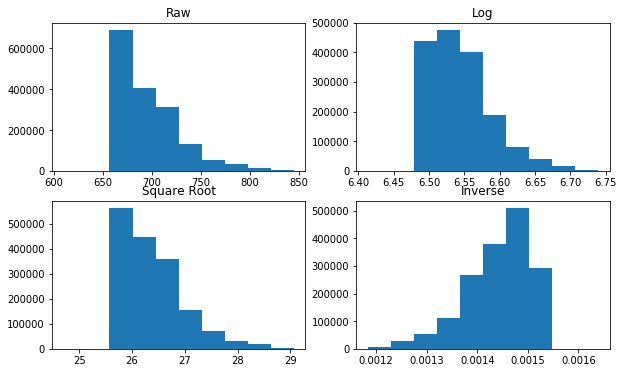

In [450]:
#Look at fico range distribution
fig = plt.figure(figsize=(10,6))

fig.add_subplot(221)
plt.hist(data["fico_range_low"].dropna())
plt.title("Raw")

fig.add_subplot(222)
plt.hist(np.log(data["fico_range_low"].dropna()))
plt.title("Log")
    
fig.add_subplot(223)
plt.hist(np.sqrt(data["fico_range_low"].dropna()))
plt.title("Square Root")

fig.add_subplot(224)
plt.hist(1/data["fico_range_low"].dropna())
plt.title("Inverse")
plt.show()

In [451]:
#See dti statistics to create a category
data.dti.describe()


count    1.646421e+06
mean     1.852473e+01
std      1.098422e+01
min     -1.000000e+00
25%      1.207000e+01
50%      1.789000e+01
75%      2.432000e+01
max      9.990000e+02
Name: dti, dtype: float64

### Create Features

In [403]:
features = pd.DataFrame()

In [425]:
#Create Features

#Features from raw variables
features["fico"] = data["fico_range_low"]
features["dti"] = data["dti"]

#Features from normalizing calculations
features["loan_amt_sqrt"] = np.sqrt(data["loan_amnt"])
features["revol_util_inver"] = (1/data["revol_util"])
features["revol_util"] = (data[("revol_util")])
features["fico_inver"] = (1/data["fico_range_low"])

#Features from creatings categories
features["fico_very_low"] = np.where(data["fico_range_low"] < 685, 1, 0)
features["jumbo_loan"] = np.where(data["loan_amnt"] > 15000,1,0)
features["high_dti"] = np.where(data["dti"] > 24.3,1,0)
features["60_Month"] = np.where(data["term"] == " 60 months",1,0)

In [427]:
features.head(5)

,fico,dti,loan_amt_sqrt,jumbo_loan,revol_util_inver,fico_very_low,fico_log,high_dti,fico_inver,60_Month,int_rate,revol_util
0,750.0,12.03,122.474487,0,0.034483,0,6.620073,0,0.001333,1,12.39,29.0
1,710.0,14.92,101.980390,0,0.031646,0,6.565265,0,0.001408,0,6.99,31.6
2,685.0,18.49,146.372812,1,0.013123,0,6.529419,0,0.001460,1,15.59,76.2
3,665.0,8.31,113.137085,0,0.009911,1,6.499787,0,0.001504,1,17.14,100.9
4,685.0,34.81,87.464278,0,0.010881,0,6.529419,1,0.001460,0,13.66,91.9


#### Filter Features

In [428]:
#Add Interest rates to features in order to do a correlation matrix
features["int_rate"] = data["int_rate"]

In [431]:
#Split Features in to two groups to better see matrix
features_set_1 = features[["int_rate", "dti","fico","loan_amt_sqrt","jumbo_loan","revol_util"]]
features_set_2 = features[["int_rate", "fico_very_low","fico_log","high_dti","fico_inver","60_Month"]]

In [432]:
#Create both correlation matrices
corrmat_1 = features_set_1.corr()
print(corrmat_1)
corrmat_2 = features_set_2.corr()
print(corrmat_2)

               int_rate       dti      fico  loan_amt_sqrt  jumbo_loan  revol_util
int_rate       1.000000  0.146022 -0.400822       0.132791    0.129228    0.239027
dti            0.146022  1.000000 -0.055315       0.043430    0.042439    0.139453
fico          -0.400822 -0.055315  1.000000       0.099973    0.089387   -0.449614
loan_amt_sqrt  0.132791  0.043430  0.099973       1.000000    0.818592    0.121844
jumbo_loan     0.129228  0.042439  0.089387       0.818592    1.000000    0.108130
revol_util     0.239027  0.139453 -0.449614       0.121844    0.108130    1.000000
               int_rate  fico_very_low  fico_log  high_dti  fico_inver  60_Month
int_rate       1.000000       0.299931 -0.402018  0.153260    0.402769  0.395955
fico_very_low  0.299931       1.000000 -0.726118 -0.000912    0.740090 -0.026264
fico_log      -0.402018      -0.726118  1.000000 -0.037540   -0.999553  0.002652
high_dti       0.153260      -0.000912 -0.037540  1.000000    0.035998  0.055557
fico_inver    

In [453]:
#Based on correclation matrix these are the final filtered features.  
#Chose features with the highest correlation to int_rate, the outcome variable
filtered_features = [["60_month", "fico_inver","high_dti", "loan_amt_sqrt","revol_util"]]